# Data intelligence Application Project

# Introduction

The goal of the project is to find the best joint bidding and pricing strategy to attract more user on an e-commerce website. In this way we can sell more items and also try to fidelize the users after the first purhcase. 

First of all we define the scenario, the product we want to sell and the idea behind the choice we make


### Product to sell

The product that we want to sell is an anti wrinkle cream.
We choose this product because nowadays people in general take more care about their beauty and more specifically on their skins. 
A cream is a product for everyone, easy to sell and to advertise that can be manufactured with low price and sold at an higher price, if well sposorized.
A cream is also a product that can be buyed with a fixed frequency (monthly in our case) and, if a person think that the product is good, he is going to buy it over time

### User Features and Classes

We have identified 3 classes of potential buyer characterizeb by 2 principal features
#### Features
* *Gender*: 
    * Male
    * Female
* *Age*:
    * Young, before 30y/o
    * Adult, after 30y/o

#### Classes:
|       | Female | Male |
|-------|:----------:|--------------:|
| **Young** | x        |           |
| **Adult** | x        |   x           |
    
*  **Male-Adult(C1)**: This is the less intrested class in buying the product but we think that the are many pontential buyers, they are not willing to pay much for a cream
*  **Female-Adult(C2)**: This is the more intrested class, they are willing to spend much for the product, first of all because they have the economic availability and because a cheaper product may be intrepreted as a bad quality product
*  **Female-Young(C3)**: This class does not have high economic capabilities, so the price need to be less then the price for the Class 2, also because they usually don't care about the quality 

# Enviroment

### Conversion Rate

For the conversion rate we have defined 10 points for each class and using a quintic regression we have estimated a function for each one


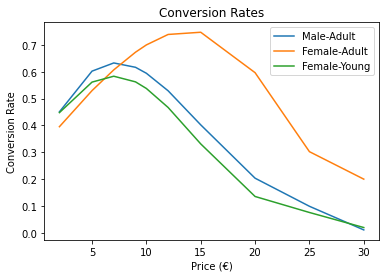

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

terms1 = [
     2.7201569788151064e-001,
     1.0492858071043640e-001,
    -7.7219072733113589e-003,
    -7.8440033424782515e-005,
     1.5070734117821789e-005,
    -2.6951793857949948e-007
]

def regressC1(x):
  t = 1
  r = 0
  for c in terms1:
    r += c * t
    t *= x
  return r

terms2 = [
     2.8737573993069027e-001,
     5.9510040146659365e-002,
    -3.3835350515498425e-003,
     3.3437236649835021e-004,
    -2.1899899222428644e-005,
     4.0670620526356083e-007
]

def regressC2(x):
  t = 1
  r = 0
  for c in terms2:
    r += c * t
    t *= x
  return r


terms3 = [
     3.3159910846623597e-001,
     6.2264260733061391e-002,
    -1.0506786208669700e-003,
    -5.9692898283301293e-004,
     3.3636918621988781e-005,
    -5.0878883129873533e-007
]

def regressC3(x):
  t = 1
  r = 0
  for c in terms3:
    r += c * t
    t *= x
  return r

prices=np.intc([2 ,5,7,9, 10,12, 15, 20, 25, 30 ])


fig = plt.figure() 
plt.plot(prices,regressC1(prices), label="Male-Adult") 
plt.plot(prices,regressC2(prices), label="Female-Adult")
plt.plot(prices,regressC3(prices), label="Female-Young")
plt.title("Conversion Rates")
plt.xlabel("Price (€)")
plt.ylabel("Conversion Rate")
plt.legend()
plt.show() 

### Cost Per Click

The cost of a single click depend on the bid, we tought that a reasonable random variabile that follow a uniform distribution with a=bid-0.05*bid and b=bid+0.05*bid

In [ ]:
def costPerClick(bid):
        s= np.random.uniform(bid-0.05*bid, bid+0.05*bid,1)
        return(s)

### Number of click

Also the number of click depend on the bid, and we tought that a reasonable function that simulate the increasing behavior can be the tanh function. We cap the maximum daily click at 500 per day.
The randomness is added trought a random variable that follow a uniform distribution which support is
$x\in[(1-0.05)*500*tanh(bid),(1+0.05)*500*tanh(bid)]$

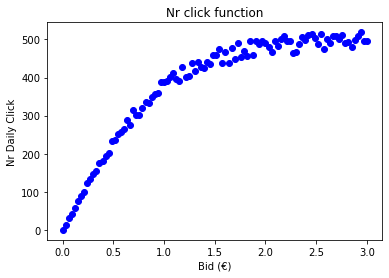

In [ ]:
def nrDailyClick(bid):
        meanNrClick = math.trunc(500*math.tanh(bid))
        nrClick= math.trunc(np.random.uniform(meanNrClick-0.05*meanNrClick, meanNrClick+0.05*meanNrClick,1)[0])
        return nrClick

bids= np.linspace(0,3.0, 100)
    
fig = plt.figure() 
for bid in bids:
    plt.scatter(bid,nrDailyClick(bid), color="blue") 
    
plt.title("Nr click function")
plt.xlabel("Bid (€)")
plt.ylabel("Nr Daily Click")
plt.show() 

### Distribution probability over the number of times the user will come back

The probability that the user will come back to the e-commerce website to buy that item by 30 days after the first purchase is simulated trhought this function
$p(month)=\frac{month}{month+2}$ where $x$ is the month we are referring.<br>
This comes by the fact that the first time the user buy the product we have a 0.33 probability that the user come back, due the fact that we don't know if he like the product and during this period he may find another product with better price.



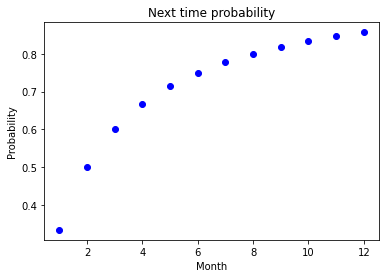

In [ ]:
def nextTimeProbability(month):
        return(month/(2+month))

months=np.linspace(1,12,12)

fig = plt.figure() 
for month in months:
    plt.scatter(month,nextTimeProbability(month), color="blue") 
    
plt.title("Next time probability")
plt.xlabel("Month")
plt.ylabel("Probability")
plt.show() 

## Step 1

The goal of the first step is to formulate the objective function, with the assumptions that once a user makes a purchase of an item that costs a certain price, then the ecommerce will propose the same price to future visits of the same user and this user will buy the product for sure. 


* $i$ is the class
* $j$ is the price of the product
* $p_{ij}$ is the probability that the class will buy the product at a given price $j$ (conversion rate)
* $c$ is the fixed cost
* $x$ is the bid
* $v(x)$ is the stochastic cost per click depending on the bid
* $t$ is the time frame we consider.
* $n(x)$ is the stochastic number of click depending on the bid x.
* $\varphi$ is the number of times a customer will buy the product again


The goal is to maximize the profit, which yields the following model
\begin{equation*}
 max \sum_{0}^{T} \sum_{i}^{3}(\varphi \cdot  p_{ij}(j-c)-v(x))*n_{i,t}(x)
\end{equation*}

The joint pricing/bidding algorithm is then as following<br>
For every class $i \in I$<br>
For every possible bid $x \in X$<br>
For possible price  $p \in P$<br>


\begin{equation*}
 j,x = arg max(\varphi \cdot  p_{ij}(j-c)-v(x))n_{i,t}(x)
\end{equation*}

the complexity is in $O(|I|*|X|*|P|)$

## Step 2

In the step 2 we need to consider the online learning version of the above optimization problem when the parameters are not know.
The random variables wich we don't know a priori are:
* Number of daily click
* Cost per click
* Conversion Rate

The model for each one of the random variable are explained in the Enviroment.


#### Potential delay in the feedback

The potential delay in the feedback is given by the fact that once a user click on the ad he may need many days to decide wether 
complete the purchase or not, so we need to take track of the sigle user using for example cookies. In this way we can use this data to estimate also e number of user that didn't make the purchase we click the ad and use this information futurely to update estimation.

## Step 3

In the third step we need to consider the case in which the bid is fixed and try to learn in online fashion the best pricing strategy when there is no distinction among the classes. We also assume that the number of daily click and the daily cost per click are known.

To do that we first of all make an average of the three different conversion rate of the three classes.
We fix the bid and the cost per click as 1.0 while the number of daily click is set to 380.<br>
Every day we pull an arm that represent a price. The experiment lasts 365 days.<br>
For every click, we play a round and we get a reward that can be 0(user didn't buy the product) or 1(the user have bought the product). 
If it is 0 we are losing money cause we have to pay the click, otherwise we increment the daily reward.

The cumulative reward is calculated as follow:




In [ ]:
cumRewardTS+=reward*(prezzi[pulled_armTS]/max_prezzo)

cumRewardUCB1+=reward*(prezzi[pulled_armTS]/max_prezzo)


This is done because we need to normalize the reward to give more importance to an higher price with respect a lower price. We cannot simply consider the reward itself because the lower prices provide more cumulative rewards in absolute but maybe provide less revenue. Is better to sold 1 cream at 20 euro thant sold 5 cream at 3 euro. <br>
At the end of the day we update the distributions associated to the arms.

In [ ]:
ts_learner.update(pulled_armTS,cumRewardTS/nrClick)
ucb1_learner.update(pulled_armUCB1, cumRewardUCB1/nrClick)

As we expected the final revenue provided by the TS is higher than the revenue provided by UCB1. And we have also theoretical guarantee that the regret goes to 0 faster in TS 


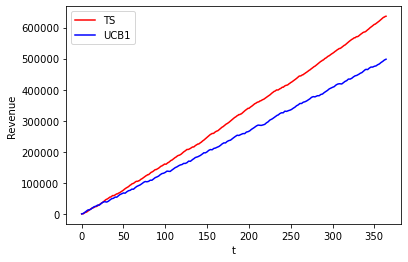

## Step 4

In the 4th step we make class differentiation.<br>
For doing that we have defined a single TS learner. Every day we pull an arm that is the price that is presented to every user indipendently of the class he belongs to.<br>
We assume that the number of click are equally distributed among the three classes.<br>
In this step when a user see the ad he make a choise accordingly to the specific class probability, this is the big change with respect the step 3. <br>
For experiment purpose we simulate also the fact that we can make discrimination at advertise level, this means that user belonging to a different class see different prices. To do this we define three different learners, one for each class assuming that the number of daily click are equally distributed



In [ ]:
for t in range (0,T):
    #pull TS arms
    pulled_armC1=ts_learnerClass1.pull_arm() 
    pulled_armC2=ts_learnerClass2.pull_arm() 
    pulled_armC3=ts_learnerClass2.pull_arm() 
    pulled_armSingle=ts_learnerSingle.pull_arm()

    #I pull a new arm every day, and i can distinguish the three different
    #class, and propose to each of them a different class
    #Class 1
    
    for x in range(0, nrClickPerClass):
        #Getting reward from his best arm
        reward= envClass1.round(pulled_armC1) #calcolo il reward
        cumRewardTSC1+=reward*(prezzi[pulled_armC1]/max_prezzo)
        dailyTS+=reward*prezzi[pulled_armC1]-costPerClick
    
        #using single learner 
        reward= envClass1.round(pulled_armSingle)    
        dailyTSSingle+= reward*prezzi[pulled_armSingle]-costPerClick
        cumRewardSingle+=reward*(prezzi[pulled_armSingle]/max_prezzo)

    #Class 2
    for x in range(0, nrClickPerClass):
        #Getting reward from his best arm
        reward= envClass2.round(pulled_armC2) #calcolo il reward
        cumRewardTSC2+=reward*(prezzi[pulled_armC2]/max_prezzo)
        dailyTS+=reward*prezzi[pulled_armC2]-costPerClick
               
               
        #using single learner
        
        reward= envClass2.round(pulled_armSingle)
        dailyTSSingle+= reward*prezzi[pulled_armSingle]-costPerClick
        cumRewardSingle+=reward*(prezzi[pulled_armSingle]/max_prezzo)
        
     
    #Class 3
    for x in range(0, nrClickPerClass):
        #Getting reward from his best arm
        reward= envClass3.round(pulled_armC3) #calcolo il reward
        cumRewardTSC3+=reward*(prezzi[pulled_armC3]/max_prezzo)
        dailyTS+=reward*prezzi[pulled_armC3]-costPerClick
                
        
        #using single learner
        
        reward= envClass3.round(pulled_armSingle)
        dailyTSSingle+= reward*prezzi[pulled_armSingle]-costPerClick
        cumRewardSingle+=reward*(prezzi[pulled_armSingle]/max_prezzo)
    
    
    #make the average of the cumulative reward 
    totalRevenueTS.append(dailyTS)
    totalRevenueSingle.append(dailyTSSingle)


    ts_learnerClass1.update(pulled_armC1,cumRewardTSC1/nrClickPerClass)
    ts_learnerClass2.update(pulled_armC2,cumRewardTSC2/nrClickPerClass)
    ts_learnerClass3.update(pulled_armC3,cumRewardTSC3/nrClickPerClass)
    ts_learnerSingle.update(pulled_armSingle, cumRewardSingle/(3*nrClickPerClass))


Here the graphs showing the cumulative reward. <br>
The final revenue in the step 4 is in average higher, but there is no real big difference.<br> 
Making a distinction also at advertising level can increase the revenue




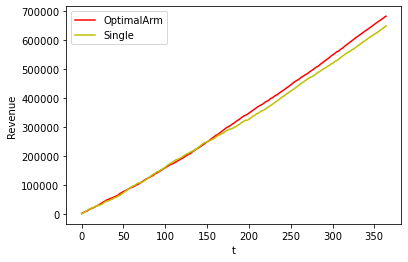

## Step 5

In this step we Consider the case in which the prices are fixed and learn in online fashion the best bidding strategy when the algorithm does not discriminate among the customers’ classes. Assuming that the conversion probability is known. <br>

And implement the saftey protocol to pick the arms whose probability of getting negative revenue is greater than 20 percent. We implemented this saftey protocal in the respective learning algorithms.

In [ ]:
class GTS_Learner():
    def pull_arm(self):
        bool_arr = self.revenue_probs > 0.20
        idxs = np.where(bool_arr)[0]
        ms = [self.means[i] for i in idxs]
        sigs = [self.sigmas[i] for i in idxs]
        idx = np.argmax(np.random.normal(ms, sigs))
        return idxs[idx]

In [ ]:
for i in range(0,10):
    for j in range(0,4):
        reward = env.round(u_idx)
        u_idx += 1
        u_idx = u_idx % 10
        pulled_arm = u_idx
        reward = env.round(pulled_arm)
        nof = reward * conv_prob
        cost = context.costPerClick(env.bids[pulled_arm]) * reward
        profit = profit_margin * nof
        if(profit > cost):
            rp[pulled_arm] += 1
            gts_learner.revenue_probs[pulled_arm] = (rn[pulled_arm]) /  (rp[pulled_arm] + rn[pulled_arm])
        else: 
            rn[pulled_arm] += 1
            gts_learner.revenue_probs[pulled_arm] = (rn[pulled_arm]) /  (rp[pulled_arm] + rn[pulled_arm])

        gts_learner.update(pulled_arm, reward) 


for t in range(10, T):   
    for j in range(0,4):
        #Gaussian Process Thompson Sampling Learner
        pulled_arm = gts_learner.pull_arm()
        reward = env.round(pulled_arm)
        nof = reward * conv_prob
        cost = context.costPerClick(env.bids[pulled_arm]) * reward
        profit = profit_margin * nof 
        if(profit > cost):
            rp[pulled_arm] += 1
            gts_learner.revenue_probs[pulled_arm] = (rn[pulled_arm]) /  (rp[pulled_arm] + rn[pulled_arm])
        else: 
            rn[pulled_arm] += 1
            gts_learner.revenue_probs[pulled_arm] = (rn[pulled_arm]) /  (rp[pulled_arm] + rn[pulled_arm])
        
        gts_learner.update(pulled_arm, reward)


Above we are filtering the arms whose probability is greater than 20 percent and pulling the arm from only those.

And we fixed the values of price and conversion rate to avergae of the prices and conversionrates respectively, and took a 15 percent as the profit margin on that price and caluclated the revenue. And we used the environment function for the *cost_per_click()* 

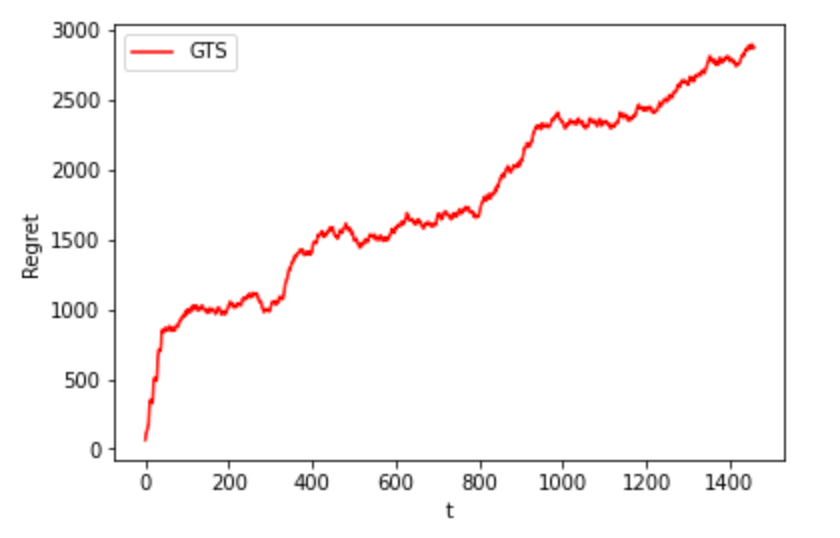

The above graph is the cummulative sum of regret over the period of one year

## Step 6

In this step we tried to get the best joint bidding of both pricing and bidding without classifation of the customer classes. We tried to get the best price and best bid at every step and updated the reward accordingly.

we used TSLearner GPTS for both pricing arms and bidding arms respestively. we used the reward of bidding arm as the variable in the pricing reward caluclation. And similarly as in step 5 we used the pricing arm conversion probability for the bidding reward conversion rate.

We also included the saftey rule same as in step 5

In [ ]:
for t in range(0, T_days):
    pulled_bid_arm = gpts_learner.pull_arm()
    bid_reward = b_env.round(pulled_bid_arm)
    
    pulled_price_arm = ts_learner.pull_arm()
    no_of_clicks = bid_reward * cum_probs[pulled_price_arm]
    cost_per_click = context.costPerClick(bids[pulled_bid_arm])

    for k in range(0, int(bid_reward)):
        price_reward = p_env.round(pulled_price_arm)
        cum_rewardTS += price_reward * (prices[pulled_price_arm] / max_price)
        dailyTS += price_reward * prices[pulled_price_arm] - cost_per_click
    
    totalRevenueTS.append(dailyTS)
    ts_rewards.append(cum_rewardTS / int(bid_reward))
    ts_learner.update(pulled_price_arm , cum_rewardTS / int(bid_reward))
    dailyTS = 0
    cum_rewardTS = 0

    profit = prices[pulled_price_arm] * profit_margin * no_of_clicks
    if(profit > (cost_per_click * bid_reward)):
        rp[pulled_bid_arm] += 1
        gpts_learner.revenue_probs[pulled_bid_arm] = (rp[pulled_bid_arm]) /  (rp[pulled_bid_arm] + rn[pulled_bid_arm])
    else: 
        rn[pulled_bid_arm] += 1
        gpts_learner.revenue_probs[pulled_bid_arm] = (rp[pulled_bid_arm]) /  (rp[pulled_bid_arm] + rn[pulled_bid_arm])
    gpts_learner.update(pulled_bid_arm, no_of_clicks)


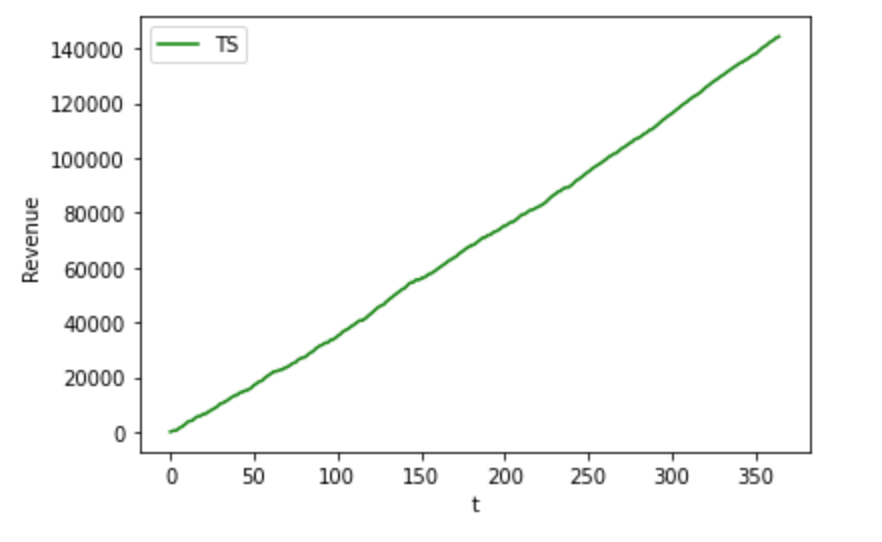

## Step 7

In this step we tried to find the best joint bidding between pricing and bidding with classification of customers. We followed similar strategy as step 4 and step 6. we took three learners for pricing and used specific probabilities according to the customer classes.

We used only one learner for bidding and used the bidding reward for all the prcing learners and updated the profits according to their conversion rates.

In [ ]:
for t in range (0,T):
    #pull TS arms
    p_pulled_armC1 = ts_learnerClass1.pull_arm() 
    p_pulled_armC2 = ts_learnerClass2.pull_arm() 
    p_pulled_armC3 = ts_learnerClass3.pull_arm() 
    p_pulled_armSingle = ts_learnerSingle.pull_arm()

    b_pulled_arm = gts_learner.pull_arm()
    bid_reward = b_env.round(b_pulled_arm)

    no_of_clicks1 = int(bid_reward * probs[0][p_pulled_armC1]) + 1
    no_of_clicks2 = int(bid_reward * probs[1][p_pulled_armC2]) + 1
    no_of_clicks3 = int(bid_reward * probs[2][p_pulled_armC3]) + 1
    
    cost_per_click = context.costPerClick(bids[b_pulled_arm])
    
    #Class 1
    for x in range(0, no_of_clicks1):
        #Getting reward from his best arm
        reward = p_envClass1.round(p_pulled_armC1) #calcolo il reward
        cumRewardTSC1 += reward * (prices[p_pulled_armC1] / max_price)
        dailyTS += reward * prices[p_pulled_armC1] - cost_per_click
    
        #using single learner
        reward = p_envClass1.round(p_pulled_armSingle)    
        dailyTSSingle += reward * prices[p_pulled_armSingle] - cost_per_click
        cumRewardSingle += reward * (prices[p_pulled_armSingle] / max_price)
        
    #Class 2
    for x in range(0, no_of_clicks2):
        #Getting reward from his best arm
        reward = p_envClass2.round(p_pulled_armC2) #calcolo il reward
        cumRewardTSC2 += reward *(prices[p_pulled_armC2] / max_price)
        dailyTS += reward * prices[p_pulled_armC2] - cost_per_click
      
        #using single learner        
        reward = p_envClass2.round(p_pulled_armSingle)
        dailyTSSingle += reward * prices[p_pulled_armSingle] - cost_per_click
        cumRewardSingle += reward * (prices[p_pulled_armSingle] / max_price)
        
    #Class 3
    for x in range(0, no_of_clicks3):
        #Getting reward from his best arm
        reward = p_envClass3.round(p_pulled_armC3) #calcolo il reward
        cumRewardTSC3 += reward * (prices[p_pulled_armC3] / max_price)
        dailyTS += reward * prices[p_pulled_armC3] - cost_per_click
                
        #using single learner
        reward = p_envClass3.round(p_pulled_armSingle)
        dailyTSSingle += reward * prices[p_pulled_armSingle] - cost_per_click
        cumRewardSingle += reward * (prices[p_pulled_armSingle] / max_price)
    
    #make the average of the cumulative reward 
    totalRevenueTS.append(dailyTS)
    totalRevenueSingle.append(dailyTSSingle)
    
    ts_rewardsC1.append(cumRewardTSC1/no_of_clicks1)  
    ts_rewardsC2.append(cumRewardTSC2/no_of_clicks2)  
    ts_rewardsC3.append(cumRewardTSC3/no_of_clicks3)  

    total_clicks = no_of_clicks1 + no_of_clicks2 + no_of_clicks3    
    ts_learnerClass1.update(p_pulled_armC1,cumRewardTSC1/no_of_clicks1)
    ts_learnerClass2.update(p_pulled_armC2,cumRewardTSC2/no_of_clicks2)
    ts_learnerClass3.update(p_pulled_armC3,cumRewardTSC3/no_of_clicks3)
    ts_learnerSingle.update(p_pulled_armSingle, cumRewardSingle/total_clicks)
    
    profit1 = prices[p_pulled_armC1] * profit_margin * no_of_clicks1
    profit2 = prices[p_pulled_armC2] * profit_margin * no_of_clicks2
    profit3 = prices[p_pulled_armC3] * profit_margin * no_of_clicks3
    total_profit = profit1 + profit2 + profit3
    if(total_profit > (cost_per_click * bid_reward * 3)):
        rp[b_pulled_arm] += 1
        gts_learner.revenue_probs[b_pulled_arm] = (rp[b_pulled_arm]) /  (rp[b_pulled_arm] + rn[b_pulled_arm])
    else: 
        rn[b_pulled_arm] += 1
        gts_learner.revenue_probs[b_pulled_arm] = (rp[b_pulled_arm]) /  (rp[b_pulled_arm] + rn[b_pulled_arm])
    gts_learner.update(b_pulled_arm, total_clicks)
    
    cumRewardTSC1=0
    cumRewardTSC2=0
    cumRewardTSC3=0
    cumRewardSingle=0
    dailyTS=0
    dailyTSSingle=0


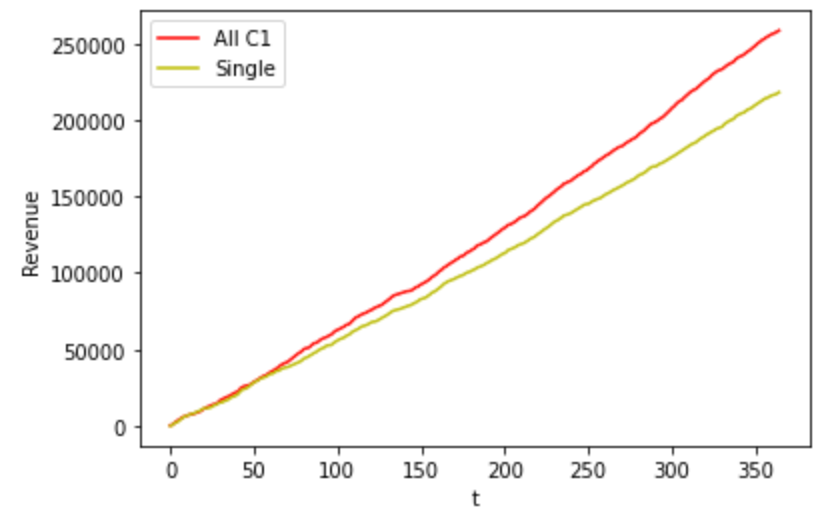